### Burnout Rate prediction
How well can we predict an individual's burn rate?

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics


# import cleaned dataset
df = pd.read_csv(r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\clean_df_train.csv")

df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
0,1,0,0,2.0,3.0,3.8,0.16,4478
1,0,0,1,1.0,2.0,5.0,0.36,4417
2,0,0,1,1.0,1.0,2.6,0.20,4444
3,1,0,0,3.0,7.0,6.9,0.52,4546
4,0,1,1,2.0,4.0,3.6,0.29,4421


In [3]:
# Linear Regression
X = df[['Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score','days_count']]
y = df['Burn Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)
r2_train = r2_score(y_train, y_train_preds)
r2_test = r2_score(y_test, y_test_preds)

print(r2_train, '\n', r2_test)
print(lm_model.intercept_)
print(lm_model.coef_)
print(y_train_preds)

0.9207684047874273 
 0.9202038154359504
-0.09515842858581602
[-4.71055872e-03 -3.30296603e-04 -1.11114967e-02 -4.56368678e-03
  2.84583850e-02  7.40899831e-02  3.00987676e-06]
[0.72100447 0.63021342 0.43407264 ... 0.33394635 0.36158428 0.70767981]


In [4]:
# Random Forest

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_train_preds_rf = rf_model.predict(X_train)
y_test_preds_rf = rf_model.predict(X_test)

r2_train_rf = r2_score(y_train, y_train_preds_rf)
r2_test_rf = r2_score(y_test, y_test_preds_rf)
print(r2_train_rf, '\n', r2_test_rf)

0.9882952037216456 
 0.9152488493341119


### Evaluation, result comparison, error statistics
Linear Regression has a better result on test, go ahead with a linear model

In [6]:
# checking the prediction accuracy
y_train_preds_df = pd.DataFrame(data=y_train_preds, columns=['Prediction'], index=X_train.index.copy())

df_out = pd.merge(df, y_train_preds_df, how='left', left_index = True, right_index=True)
df_out.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count,Prediction
0,1,0,0,2.0,3.0,3.8,0.16,4478,NaN
1,0,0,1,1.0,2.0,5.0,0.36,4417,0.329828
2,0,0,1,1.0,1.0,2.6,0.20,4444,0.123635
3,1,0,0,3.0,7.0,6.9,0.52,4546,NaN
4,0,1,1,2.0,4.0,3.6,0.29,4421,0.278137


In [7]:
# drop NaN
df_out.dropna(subset=["Prediction"], axis=0, inplace = True)
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 1 to 18589
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                14872 non-null  int64  
 1   Company Type          14872 non-null  int64  
 2   WFH Setup Available   14872 non-null  int64  
 3   Designation           14872 non-null  float64
 4   Resource Allocation   14872 non-null  float64
 5   Mental Fatigue Score  14872 non-null  float64
 6   Burn Rate             14872 non-null  float64
 7   days_count            14872 non-null  int64  
 8   Prediction            14872 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.1 MB


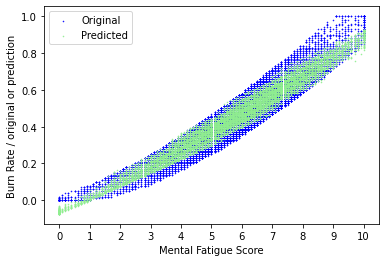

In [8]:
# original vs predicted comparison
v = df_out['Burn Rate']
z = df_out['Prediction'] 
w = df_out['Mental Fatigue Score']

plt.scatter(w, v, color="blue", label="Original", s=0.3)
plt.scatter(w, z, color="lightgreen", label="Predicted", s=0.3)
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Burn Rate / original or prediction")
plt.xticks(range(0,11))
plt.legend()
plt.show()

The model underestimates below 2 and above 8, but the general sample is between these two numbers. 8 is already enough high score to highlight the need of necessary intervention.

In [9]:
# Error statistics
print('MAE: ', metrics.mean_absolute_error(v, z))
print('MSE: ', metrics.mean_squared_error(v, z))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(v,z)))

MAE:  0.04564441988103926
MSE:  0.003115770663610376
RMSE:  0.05581908870279392
